## Costs



### Preface



There are a few modules you may need to install:



In [1]:
!pip install -r requirements.txt
import pandas as pd
import cfe
import numpy as np

Missing dependencies for OracleDemands.


In [3]:
URL = {'Indian ICRISAT':'https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo'}
DAYS_PER_PERIOD = {'Indian ICRISAT':365.25}

Exploit fact that we&rsquo;ve already estimated demand systems for a bunch
of different countries.  Choose one:



In [6]:
food_list = pd.read_csv('food_list.csv')
r = cfe.from_dataset('./Indian ICRISAT_small.ds',engine='netcdf4')
food_list

,i,t,m,prices
0,apple,1,1,126.592908
1,arhar (tur),1,1,52.544116
2,banana,1,1,21.421793
3,besan,1,1,67.844577
4,black pepper,1,1,405.984789
...,...,...,...,...
85,tomato,1,1,16.564789
86,turmeric,1,1,188.681783
87,urd,1,1,53.186266
88,wheat/atta - P.D.S.,1,1,9.341238


### Ceteris Paribus



We begin by setting up some benchmarks for prices and budgets, so
    the things we don&rsquo;t want to change we can hold fixed.



In [7]:
import numpy as np

my_t = r.coords['t'].data.flatten()[0]
my_m = r.coords['m'].data.flatten()[0]
my_i = 'Bengalgram Dhal'

p = r.prices.sel(t=my_t,m=my_m,drop=True)
phat = p.to_dataframe('i').dropna().squeeze()

ref_price = r.prices.sel(i=my_i,t=my_t,m=my_m)
P = np.linspace(ref_price/10,ref_price*5,50)

def my_prices(p0,p=phat,i=my_i):
    p = p.copy()
    p.loc[i] = p0
    return p.squeeze()

phat

i
Bengalgram Dhal           7.025319
Brinjal                   0.845954
Ceremonial expenses    1150.546276
Chillies                  3.023207
Greengram (Mung)          2.671608
Gur (Jaggery)             2.585754
Jowar/Sorghum             1.521374
Milk                      4.140857
Onion                     1.487030
Other Dhal                6.599156
Other Spices              3.829967
Pan, Betel, etc.         27.440280
Redgram Dhal              8.348026
Rice                      3.945993
Sugar                     2.744875
Tea                      14.918429
Tomato                    0.493349
Wheat                     2.298911
Name: i, dtype: float64

### Changing Budget



In [8]:
xbar = r.get_predicted_expenditures().sel(t=my_t,m=my_m).sum('i')
xbar = xbar.where(xbar>0)
x0 = xbar.quantile(0.5,'j')
X = np.linspace(x0/10,x0*5,50)

#### Marshallian vs. Hicksian Demand Curves



/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings

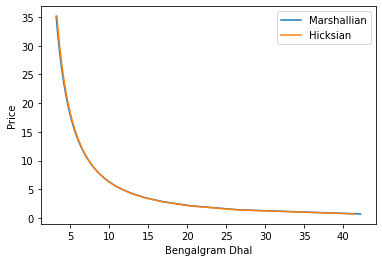

In [9]:
import matplotlib.pyplot as plt

my_i = 'Bengalgram Dhal'

U0 = r.indirect_utility(x0,p)

plt.plot([r.demands(x0,my_prices(p0,i=my_i))[my_i] for p0 in P],P)
plt.plot([r.demands(U0,my_prices(p0,i=my_i),type="Hicksian")[my_i] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(my_i)
#plt.axhline(p.sel(i=my_i).values)
plt.legend(("Marshallian","Hicksian"))

#### Welfare measures



In [10]:
def compensating_variation(U0,p0,p1):
    x0 = r.expenditure(U0,p0)
    x1 = r.expenditure(U0,p1)
    return x1-x0

def revenue(U0,p0,p1,type='Marshallian'):
    dp = p1 - p0
    c = r.demands(U0,p1,type=type)
    dp,c = dp.align(c,join='inner')
    return dp.T@c


def deadweight_loss(U0,p0,p1):
    cv = compensating_variation(U0,p0,p1)
    return cv - revenue(U0,p0,p1,type='Hicksian') 
    
    
def compensated_nutrient_demand(U,p,z=None):
    c = r.demands(U,p,z=z,type='Hicksian')
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0
    return N

def compensated_nutrient_adequacy_ratio(U,p):
    return (compensated_nutrient_demand(U,p)/hh_rdi.T).squeeze()

#### Price Changes, Revenue, and Compensating Variation



/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings

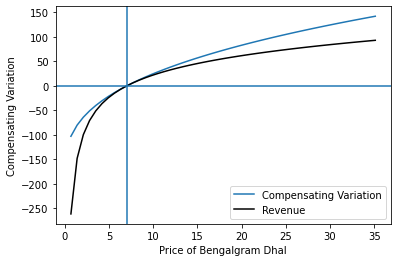

In [12]:
fig, ax1 = plt.subplots()

ax1.plot(P,[compensating_variation(U0,phat,my_prices(p0,i=my_i)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Compensating Variation")

ax1.plot(P,[revenue(U0,phat,my_prices(p0,i=my_i),type='Hicksian') for p0 in P],'k')
ax1.legend(('Compensating Variation','Revenue'))
ax1.axhline(0)
ax1.axvline(phat.loc[my_i])

#### Deadweight Loss



/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')
/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings

Text(0, 0.5, 'Deadweight Loss')

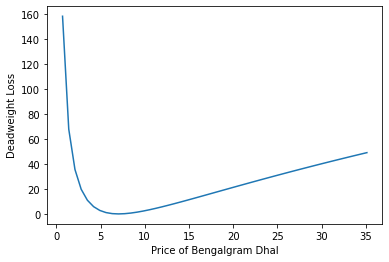

In [13]:
fig, ax1 = plt.subplots()

ax1.plot(P,[deadweight_loss(U0,phat,my_prices(p0,i=my_i)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Deadweight Loss")